In [3]:
# Initialize Otter
import otter
grader = otter.Notebook("HW2_Fall2022.ipynb")

# DATA 601

## HW2


**Learning Objectives**

- Explore collection classes in Python by applying them to probelms.
- Use intermediate level data structures and programming concepts in the context of data related problems.

_This is an individual homework assignment._ 

Please complete this homework assignment within the Jupypter notebook environment.  

#### Submission 

Your submission will be graded using a combination of autograding and manual grading. In order to ensure that everything goes smoothly, please follow these instructions:

- Please provide your solutions where asked. 
- You may add additional cells to test your code but please remove any print statements to test/debug your code. 

## Question 1: Linear Data Processing

#### (7 points)

The questions below ask you generate and process data using Python tuples, lists, sets and dictionaries. To focus on problem solving and to make your code more readable, *you may use built-in functions* associated with these Python data types. However, you may *not* use any other packages or libraries. Please try and use comprehensions wherever possible.

#### <font color='red'> Note: Passing the provided test-cases doesn't guarantee points. We check your code with other test-cases for grading.</font> 

### A) $l_1$ Norm

The $l_1$ norm, also sometimes called the taxicab norm, of a vector $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ is defined as:
$$
\lVert\mathbf{x}\rVert_1 = \sum_{i=1}^{n} \lvert x_i \rvert .
$$

Write a function called `L1norm` that takes a vector `x` as input and returns its $l_1$ norm.

In [8]:
def L1norm(x):
    norm = 0
    for i in x:
        norm += abs(i)
    return norm
        
    ''' Computes the L1 norm of the entries in vector x represented as an iterable.
        It is assumed that x is a valid iterable containing numeric entries
    '''
    ...

In [5]:
grader.check("q1a")

q1a results: All test cases passed!

### B) Integer Grid

Let us define a $d$-dimensional ($d \ge 2$) integer grid containing $n^d$ ($n \ge 1$) points as the point set:
$$
\mathbb{Z}_n^d := \{ (p_1, p_2, \ldots, p_{d}) : p_i \in \mathbb{Z} \text{ and } 0 \le p_i \le n-1 \}.
$$

Write a function called `intGrid` that takes $n$ and $d$ in the definition above as keyword parameters `n` and `dim` respectively, and returns a Python *set* containing the points in the grid as Python *tuples*. E.g. `intGrid(n=2, dim=2)` should return the set `{(0, 0), (0, 1), (1, 0), (1, 1)}`. 

In [2]:
# Functions to create permutations of point coordinates 
def addperm(x,l):
    return [l[0:i] + [x] + l[i:]  for i in range(len(l)+1)]

def perm(l):
    if len(l) == 0:
        return [[]]
    return [x for y in perm(l[1:]) for x in addperm(l[0],y)]

# Main Function
def intGrid(n=2, dim=2):
    perm_list = []
    list = [0]*dim
    if n < 0 or dim < 0:
        return set()
    for i in range(n): 
        for l, q in enumerate(list):
            fresh_list = [0]*dim
            list[l] = i
            fresh_list[l] = i
            #print(l)
            temp_list = perm(list)
            perm_list.append(fresh_list)
            for t in temp_list:
                perm_list.append(t)
    perm_tuples = []
    for x in perm_list:
        perm_tuples.append(tuple(x))
    return set(perm_tuples)
    
    ''' Returns an integer grid of dimension dim consisting of non-negative integer coordinates in the range 
        0 to n-1. 
    '''
    ...

In [8]:
grader.check("q1b")

q1b results: All test cases passed!

### C) Histogram of Distances

Using your solution to the previous two parts, write a function called `distanceHist` that takes two parameters: `n` and `dim` (as defined above) and returns a histogram of $l_1$ distances for all the points in the integer grid $\mathbb{Z}_n^d$. The histogram is returned as a dictionary whose _keys_ are the distances and _values_ are the counts of the distances. 

For example `distanceHist(n=2, dim=2)` should return the dictionary `{0: 1, 1: 2, 2: 1}`. 

In [9]:
def distanceHist(n=2, dim=2):
    distances = dict()
    vecs = intGrid(n,dim)
    for i in vecs:
        distances[L1norm(i)] = distances.get(L1norm(i),0)+1
    return dict(distances.items())
        
    ''' Returns a histogram of L1 distances for the integer grid of dimension dim consisting of 
        non-negative integer coordinates in the range 0 to n-1.
        A dictionary is returned whose keys are the L1 distances and the corresponding values are the counts 
        of the distances.
    '''
    ...

In [ ]:
grader.check("q1c")

<!-- BEGIN QUESTION -->



## Question 2: Plotting Functions

#### (8 points)

Please go through the following tutorial, focusing on the first two sections.

  [https://matplotlib.org/users/pyplot_tutorial.html](https://matplotlib.org/users/pyplot_tutorial.html)
  

Use [`matplotlib.pyplot.plot`](https://matplotlib.org/users/pyplot_tutorial.html) to plot the following sequences for $ 2 \le n \le 100$. 

 a) $f_n = \frac{n^3}{2n+3}$

 b) $f_n = n\log_2 n$ 
  <br>
  (Use `math.log2(x)` to compute base 2 logarithms. You will need to `import math`)

 c) $f_n = 
    \begin{cases}
    \frac{1}{n^2 \sqrt2} & ,\text{if } \text{ n Mod (3)}\equiv \text{ 0} \\
    0 & ,\text{otherwise}.
    \end{cases}
    $  
    (Use `math.sqrt()` for $\sqrt(2)$. You will need to `import math`)

In order to compare the relative growth rates, ***please plot within the same figure***. Use different line styles so that the sequences can be distinguished, and label your axes appropriately. Please also use logarithmic scaling on the vertical axis (`plt.yscale(‘log’)`) so that the relative magnitudes of the sequences is more apparent.



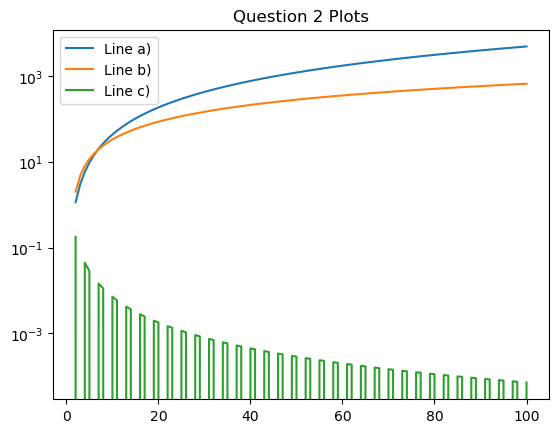

Ellipsis

In [8]:
import math
import matplotlib.pyplot as plt

# Please write your plotting code below 
sequence = list(range(2,101))
a = [(x**3)/(2*x+3) for x in sequence]
b = [x*math.log2(x) for x in sequence]
c = []
for s in sequence:
    if s % 3 == 0:
        c.append(0)
    else:
        c.append(1/((s**2)*math.sqrt(2)))
# Plots
plt.title("Question 2 Plots")
plt.plot(sequence, a, label = "Line a)")
plt.plot(sequence, b, label = "Line b)")
plt.plot(sequence, c, label = "Line c)")
plt.yscale('log')
plt.legend()
plt.show()
...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 3  : Estimating Pi with the Monte Carlo Method
#### (10 points)
**For this question you may import the random module and the math module**

One of the skills needed in data science is to navigate mathematical models and relate them to visual presentations and coding environments. This problem is intended to prompt you to think about how mathematical modeling can be incorporated into data generation and problem solving and make the connection between a model and a visualization.

This problem asks you to estimate the value of $\pi$ using the Monte Carlo method.  A high-level description of the tasks that you need to perform is provided below. You will need to think about suitable data structures and programming constructs that will accomplish the tasks. You may use built-in functions. 


Explanation of the Monte Carlo technique: The Monte Carlo method can be used to approximate $\pi$ by applying the following reasoning.  Consider a circle of radius 1, it's area will be $\pi$. One quarter of the circle, which will land in the upper right quadrant of a Cartesian plane if the center is at (0,0), will have an area of $\pi /4$. We can use this property to estimate $\pi$ by taking random points with coordinates between 0 and 1, and testing if they land inside or outside the circle in this quadrant. The fraction of points that land inside the circle multiplied by four provide an estimate of $\pi$. 

1. Write a function to estimate $\pi$. Your function should take N randomly generated points (a,b) where $0\leq a,b <1$ The function should apply the Monte Carlo method to return an approximate value of $\pi$.  (Hint: use the Euclidian distance function to find how far the point is from the center of the circle.)
2. Test the accuracy of the estimation method by running n=20 trials. Determine and record the distributions of these n=20 tests for the values $N=10$, $N=10^3$ and $N=10^6$.
3. On the same figure, plot the distributions of results corresponding to 20 trials for the different values of N, $N=10$, $N=10^3$ and $N=10^6$. For comparison, also plot the true value of $\pi$. How do the distributions of values compare to the true value of pi? In order to compare the relative accuracy of using different N values, please plot within the same figure. Use different styles so that the sequences can be distinguished, and label your axes appropriately.


Please write your code in the cells below. 


In [9]:
# Plese write your code for step one below the comments
import math 
import random 
def estimatepi(n):
    coords = []
    euc_distances = []
    for i in range(n):
        x = random.random()
        y = random.random()
        coords.append((x,y))
    for x in coords:
        euc_distances.append(((x[0]-0)**2+(x[1]-0)**2))
    return 4*(sum( i < 1 for i in euc_distances) / len(euc_distances))
        
# Step 1: Write a function to estimate $\pi$. 
# Your function should take N randomly generated points 
# (a,b) where $0\leq a,b <1$ 
# The function should apply the Monte Carlo method to return an 
# approximate value of $\pi$. 

## (Hint: use the euclidian distance function to 
##  find how far the point is from the center of the circle.)
##  If you do not know what euclidan distance is,
##  practice the imporortnat data scicne skill of
##  finding and explination when needed via other sources


...

Ellipsis

In [10]:
estimatepi(100)

3.08

In [11]:
# Please write your code for part two below the comments

# Part 2: Test the accuracy of the estimation method by 
# running n=20 trials. 
# Determine and record the distributions of 
# these n=20 tests for the values $N=10$, $N=10^3$ and $N=10^6$.
n_ten = []
n_ten_3 = []
n_ten_6 = []
for i in range(20):
    n_ten.append(estimatepi(10))
for i in range(20):
    n_ten_3.append(estimatepi(10**3))
for i in range(20):
    n_ten_6.append(estimatepi(10**6)) 

## Hint:  notice that when 
##  presented with a formula sometimes the same 
##  letter is used with a different case to denote a different parameter.
##  In this case n and N mean something different.
##  If you are finding this confusing 
##  take a moment to test out what each parameter is 
##  representing and where it fits in your model.

...

Ellipsis

Ellipsis

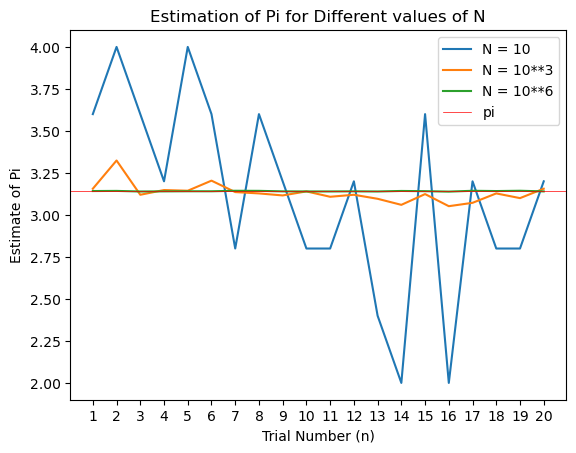

In [15]:
## Please write your code for part three below the comments
import matplotlib.pyplot as plt
n = list(range(1,20+1))
plt.plot(n, n_ten, label = 'N = 10')
plt.plot(n, n_ten_3, label = 'N = 10^3')
plt.plot(n, n_ten_6, label = 'N = 10^6')
plt.axhline(y=3.1415, linewidth = 0.5, color = 'r', label = 'Pi')
plt.title('Estimation of Pi for Different values of N')
plt.legend()
plt.xticks(n)
plt.xlabel('Trial Number (n)')
plt.ylabel('Estimate of Pi')
# 3. On the same figure, plot the distributions of results 
# corresponding to 20 trials for the differnt values of 
# N, $N=10$, $N=10^3$ and $N=10^6$. 
# For comparison, also plot the true value of $\pi$.

...

Use the cell below to explain your findings including a note on how do the distributions of values compare to the true value of pi?

_The distribtuion for N = 10 varies widely from values 2 to 4 between trials and is not a reliable estimate for pi. The distribtuion for N = 10^3 became much closer to the value of pi, only varying from around 3 to 3.25 between trials. The distribution for N = 10^6 seems to be very close to the true value of pi. When you plot pi on the graph, you cannot see a difference between the two distribtions._

<!-- END QUESTION -->

## Part B

The question in this part of the assignment is intended to:

  1) Illuminate how what you already know is useful in this context.
  
  2) Provide an exercise in writing about coding concepts and ideas and using the relevant language and terminology. 
  
  3) Demonstrate your ability to apply  the assignment material in a different format.

<!-- BEGIN QUESTION -->

### Question 1 
(3 points) 

In 100 to 250 words identify a concept you have found difficult, intriguing, or confusing from this assignment. Reflect on how the learning materials from this unit, or other materials relate to this concept, helped you to problem solve and learn from this challenge. Provide your reflection using markdown in the cell below.

_I found the concepts needed in Question 1 B) particularly difficult. In class, we learned how to make a comprehension to create a list of permutations of coordinates from a 2x2 grid. However, expanding this concept to allow a variable size of grid in multiple dimenions proved to be much more difficult that expected as I worked through the problem. I realised that recurrsion was a very useful concept that we learned for when a complex problem has many different outputs from a variable input. With this in mind, I was able to slowly chip away at a solution to the problem._

<!-- END QUESTION -->

## Submission

Make sure you have run all cells in your notebook and that they work as you expected and show any plots that are being generated. 

**Please put all testing in the appropriate code blocks and comment out or remove testing print statments. Then save your file and submit your notebook via gradescope!**